In [1]:
from sympy import *
from sympy import latex
from sympy.plotting import plot3d
from sympy.plotting.plot import plot_contour
from scipy.integrate import quad, nquad, dblquad
from sympy import init_session
%matplotlib inline
init_printing(use_unicode=True)
import numpy as np

In [5]:
px, pxdc, ell, beta, dbeta, L = symbols('\phi_x \phi_{xdc} \ell \beta \delta\beta L ')
p, pdc = var('\phi \phi_{dc}', real=True)


quadratic_p =  .5 * (p-px)**2
quadratic_pdc = .5* L/(2*ell)  * (pdc-pxdc)**2
beta_term = -beta*L *cos(.5*pdc)*cos(p)
dbeta_term = dbeta*L* sin(.5*pdc) * sin(p)


U =quadratic_p + quadratic_pdc + beta_term + dbeta_term

params1 = [[px,-.11],[pxdc,-2.5],[ell,1/24], [beta,6.2], [dbeta,.2], [L,1]]
U_sub = U.subs(params1)

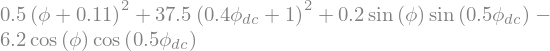

In [6]:
U_sub

## Execute the two cells above and then the one below for an interactive plot

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
from mpl_toolkits.mplot3d import Axes3D

# use the function keyword arguments below to set default values
def f(pxv=-.06, pxdcv=-2.3, ev=1/24, bv=6.2, dbv=.2, Lv=1, contour=True):
    params = [[px,pxv],[pxdc,pxdcv],[ell,ev], [beta,bv], [dbeta,dbv], [L,Lv]]
    
    U_sub = U.subs(params).simplify()
    
    #SET THE PLOT WINDOW HERE ###
    pmin, pmax, dcmin, dcmax = -6.3, 0, -3, -2.0
    resolution = 100
    #SET THE PLOT WINDOW HERE ###
    
    X,Y = np.meshgrid( np.linspace(pmin, pmax, resolution), np.linspace(dcmin, dcmax, resolution))
    ft = lambdify((p,pdc), U_sub, 'numpy')
    U_num = ft(X,Y)
    
    fig = plt.figure(figsize=(10,10))
    ax2 = fig.add_subplot(222, projection="3d")
    ax2.plot_wireframe(X,Y,U_num)
    ax3 = fig.add_subplot(221)
    ax3.contourf(X,Y,U_num)
    
    print('left min:',np.min(U_num[:,:int(resolution/2)]),'right_min:',np.min(U_num[:,int(resolution/2):]))

#SET PARAMETER RANGES HERE ### 
xrng = (-6.5, 6.5, .01)
erng = (0.01,.5,.01)
brng = (0,10,.01)
Lrng = (.001,4)
#SET PARAMETER RANGES HERE ### 


interactive_plot = interactive(f, pxv=xrng, pxdcv=xrng, ev=erng, bv=brng, dbv=brng, Lv=Lrng)
#output = interactive_plot.children[-1]
#output.layout.height = '900px'
interactive_plot

interactive(children=(FloatSlider(value=-0.06, description='pxv', max=6.5, min=-6.5, step=0.01), FloatSlider(v…